Paquetes necesarios

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

(800, 800, 3)


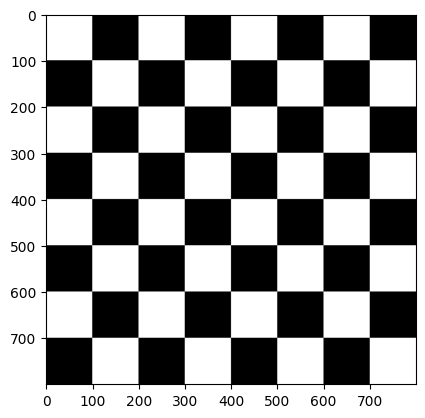

In [4]:
casilla = 100 

#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)


for i in range(0, color_img.shape[0], casilla):
    for j in range(0, color_img.shape[1], casilla):
        if (i // casilla) % 2 == (j // casilla) % 2:
            color_img[i:i+casilla, j:j+casilla] = [255, 255, 255] 
#Dimensiones
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img) 
plt.show()


TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

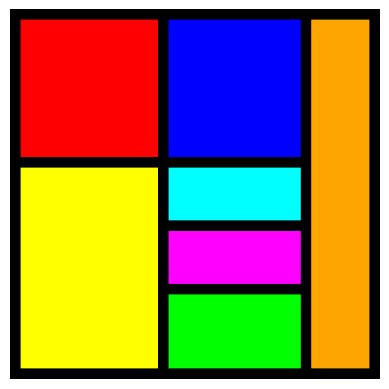

In [42]:


# Crear una imagen en negro de 350x350 píxeles
color_img = np.zeros((350, 350, 3), dtype=np.uint8)

color_img[10:140, 10:140] = [255, 0, 0] #Rojo
color_img[10:140, 150:275] = [0, 0, 255]  # Azul
color_img[10:340, 285:340] = [255, 165, 0]  # Naranja
color_img[150:340, 10:140] = [255, 255, 0] # Amarillo
color_img[150:200, 150:275] = [0, 255, 255] # Cian
color_img[210:260, 150:275] = [255, 0, 255] # Magenta
color_img[270:340, 150:275] = [0, 255, 0] # Verde

# Mostrar la imagen
plt.imshow(color_img)
plt.axis('off')  # Ocultar los ejes
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

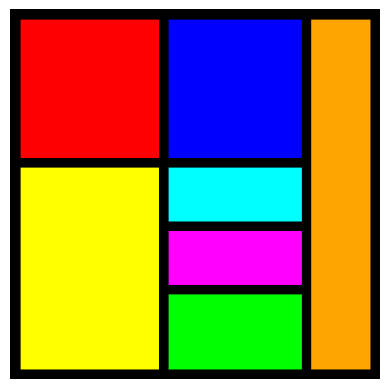

True

In [45]:
# Crear una imagen de 350x350 píxeles con 3 canales (RGB), inicialmente negra
color_img = np.zeros((350, 350, 3), dtype=np.uint8)

cv2.rectangle(color_img, (10, 10), (140, 140), (255, 0, 0), -1)  # Rojo
cv2.rectangle(color_img, (150, 10), (275, 140), (0, 0, 255), -1)  # Azul
cv2.rectangle(color_img, (285, 10), (340, 340), (255, 165, 0), -1)  # Naranja
cv2.rectangle(color_img, (10, 150), (140, 340), (255, 255, 0), -1)  # Amarillo
cv2.rectangle(color_img, (150, 150), (275, 200), (0, 255, 255), -1)  # Cian
cv2.rectangle(color_img, (150, 210), (275, 260), (255, 0, 255), -1)  # Magenta
cv2.rectangle(color_img, (150, 270), (275, 340), (0, 255, 0), -1)  # Verde

plt.imshow(color_img) 
plt.axis('off')
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [13]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #Modificaciones
        r_inv = 255 - r
        g_bright = np.clip(g + 100, 0, 255)
        b_blur = cv2.GaussianBlur(b, (45, 55), 0)

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r_inv, g_bright, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

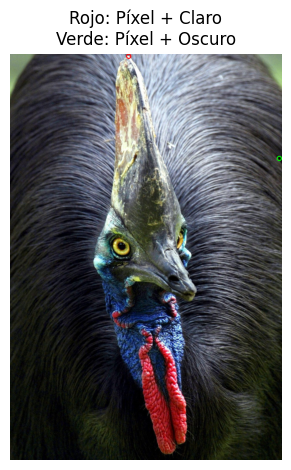

In [58]:
# Cargar la imagen y convertir a escala de grises
image = cv2.imread('../P1/Casuario.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Pixeles y coordenadas de los puntos mas claros y oscuros
pixel_oscuro, pixel_claro, coordenada_oscura, coordenada_clara = cv2.minMaxLoc(gray_image)

cv2.circle(image, coordenada_clara, 10, (0, 0, 255), 3)  # Píxel más claro
cv2.circle(image, coordenada_oscura, 10, (0, 255, 0), 3) # Píxel más oscuro

# Mostrar resultado

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir a RGB 
plt.title("Rojo: Píxel + Claro\nVerde: Píxel + Oscuro" )
plt.axis('off')

plt.tight_layout()
plt.show()

TAREA: Llevar a cabo una propuesta propia de pop art con la entrada de la cámara web o vídeo

In [16]:
# Inicializamos la captura de video
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Forzamos la mitad de resolución para ocupar menos pantalla
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Creamos una imagen conjunta 2x la original
collage = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)
tl = collage[0:h, 0:w]     # Top left
tr = collage[0:h, w:w + w] # Top right
bl = collage[h:h + h, 0:w] # Bottom left
br = collage[h:h + h, w:w + w] # Bottom right

while True:      
    # Captura fotograma a fotograma
    ret, frameIN = vid.read()

    # Reducimos tamaño
    frame = cv2.resize(frameIN, (int(w), int(h)), cv2.INTER_NEAREST)

    if ret:
        # Separamos canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        # Esquina superior izquierda: invertimos colores
        tl[:, :, 0] = 255 - b
        tl[:, :, 1] = 255 - g
        tl[:, :, 2] = 255 - r

        # Esquina superior derecha: aumentamos brillo en el canal rojo
        tr[:, :, 0] = b
        tr[:, :, 1] = g
        tr[:, :, 2] = np.clip(r + 100, 0, 255)

        # Esquina inferior izquierda: desaturar (escala de grises)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bl[:, :, 0] = gray
        bl[:, :, 1] = gray
        bl[:, :, 2] = gray

        # Esquina inferior derecha: intercambiamos los canales verde y azul
        br[:, :, 0] = g
        br[:, :, 1] = b
        br[:, :, 2] = r

        # Muestra la composición
        cv2.imshow('Pop Art Cam', collage)

    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye todas las ventanas
cv2.destroyAllWindows()